# ACME Happiness Survey 2020 - Apziva Project 1

This project involves classifying customers by satisfaction based on multiple factors. This project is split into two parts: The first is a classification model using linear and logistic regression, the second part involves an analysis of the factors to determine which are most predictive.

In [1]:
#Import data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

data = pd.read_csv('ACME-HappinessSurvey2020.csv')
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


# 1.0 Classification

In [2]:
#Measure output sample sizes to see if they are disproportionately different.

counts = data['Y'].value_counts()
print(counts)

1    69
0    57
Name: Y, dtype: int64


Above sample sizes appear within acceptable parameters (not disproportionately different). Data now ready for linear regression.

## 1.1 Linear Regression

In [3]:
#Prepare data for linear regression model.

train, test = train_test_split(data, test_size=0.2)
x_train = np.array(train['X1']).reshape((-1, 1))
y_train = np.array(train['Y'])

In [4]:
#Linear regression model.

uv_model = LinearRegression().fit(x_train, y_train)

print(f'y = {uv_model.intercept_} + {uv_model.coef_[0]}x')
print(f'R2: {uv_model.score(x_train, y_train)}')

y = -0.13899613899613894 + 0.16988416988416988x
R2: 0.07786357786357778


In [5]:
#Predict using x_test.

x_test = np.array(test['X1']).reshape((-1, 1))
y_test = np.array(test['Y'])
y_pred = uv_model.predict(x_test)

print(y_pred)

[0.54054054 0.54054054 0.37065637 0.71042471 0.71042471 0.54054054
 0.54054054 0.37065637 0.71042471 0.37065637 0.71042471 0.54054054
 0.71042471 0.54054054 0.71042471 0.54054054 0.71042471 0.37065637
 0.71042471 0.54054054 0.71042471 0.54054054 0.71042471 0.71042471
 0.37065637 0.71042471]


In [6]:
#Convert y_pred to binary values.

binary_y_pred = np.array([1 if y >= 0.5 else 0 for y in y_pred])
print(binary_y_pred)
print(y_test)

[1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1]
[0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1]


In [7]:
#Display accuracy measurements.
#Correct estimates / Total estimates (26)

correct = np.sum(binary_y_pred == y_test)
total = len(y_test)

accuracy = (correct / total) * 100
accuracy = round(accuracy, 2)
print(f'Accuracy: {accuracy}%')

Accuracy: 46.15%


Text(0.5, 15.0, 'Predicted')

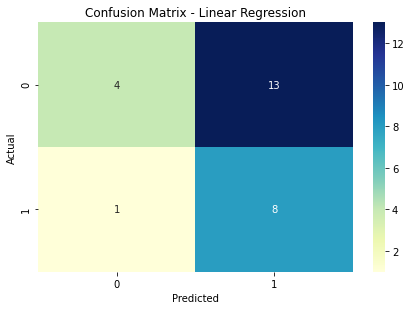

In [8]:
#Confusion matrix.

conf_matrix = metrics.confusion_matrix(y_test, binary_y_pred)

class_names = ('Unsatisfied', 'Satisfied')
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Linear Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Univariate model has low accuracy.

## 1.2 Multiple Linear Regression

In [9]:
#Train-Test split (80%).

train, test = train_test_split(data, test_size=0.2)

In [10]:
#Prepare data for multiple regression.

y_train = np.array(train['Y'])

#Function which will get proper array from dataframe.
def get_x_from(df):
    arr = []
    for col in ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']:
        arr.append(np.array(df[col]))
    arr = np.array(arr)
    arr = arr.reshape(arr.shape[1], arr.shape[0])
    return arr

x_train = get_x_from(train)

In [11]:
#Create model.

mv_model = LinearRegression().fit(x_train, y_train)

print(f'Intercept: {mv_model.intercept_}')
print(f'Coefficients: {mv_model.coef_}')
print(f'R2: {mv_model.score(x_train, y_train)}')

Intercept: 0.42798312245113024
Coefficients: [ 0.00526952  0.02157194 -0.00369419  0.03671261 -0.03197154  0.00157857]
R2: 0.014480441119093412


In [12]:
#Make predictions and test.

y_test = np.array(test['Y'])
x_test = get_x_from(test)

y_pred = mv_model.predict(x_test)

print(y_pred)

[0.57269548 0.49873857 0.56162152 0.55098086 0.50033576 0.49847831
 0.48849552 0.58244581 0.43598708 0.50694137 0.54427545 0.51178224
 0.58032696 0.57466842 0.52427884 0.42505903 0.55056405 0.56043519
 0.54585078 0.44045401 0.59733691 0.45977089 0.5825634  0.56372854
 0.62398067 0.63716702]


In [13]:
#Convert y_pred to binary values.

binary_y_pred = np.array([1 if y >= 0.5 else 0 for y in y_pred])
print(binary_y_pred)
print(y_test)

[1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
[0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1]


In [14]:
#Display accuracy measurements.
#Correct estimates / Total estimates (26)

correct = np.sum(binary_y_pred == y_test)
total = len(y_test)

accuracy = (correct / total) * 100
accuracy = round(accuracy, 2)
print(f'Accuracy: {accuracy}%')

Accuracy: 53.85%


Text(0.5, 15.0, 'Predicted')

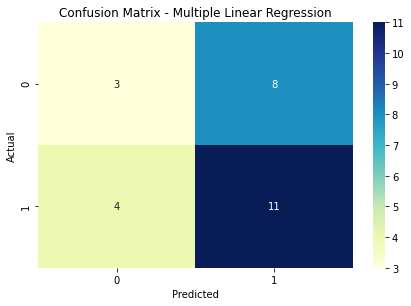

In [15]:
#Confusion matrix.

conf_matrix = metrics.confusion_matrix(y_test, binary_y_pred)

class_names = ('Unsatisfied', 'Satisfied')
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Multiple Linear Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Linear regression models continue to show low accuracy. Trying logistic regression models.

## 1.3 Logistic Regression

In [16]:
#Train-Test split (80%).

train, test = train_test_split(data, test_size=0.2)

y_train = np.array(train['Y'])
x_train = get_x_from(train)

logreg_model = LogisticRegression(random_state=10).fit(x_train, y_train)

y_test = np.array(test['Y'])
x_test = get_x_from(test)

y_pred = logreg_model.predict(x_test)
print(y_pred)
print(y_test)

[1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1]
[0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1]


In [17]:
#Display accuracy measurements.
#Correct estimates / Total estimates (26)

correct = np.sum(y_pred == y_test)
total = len(y_test)

accuracy = (correct / total) * 100
accuracy = round(accuracy, 2)
print(f'Accuracy: {accuracy}%')

Accuracy: 46.15%


Text(0.5, 15.0, 'Predicted')

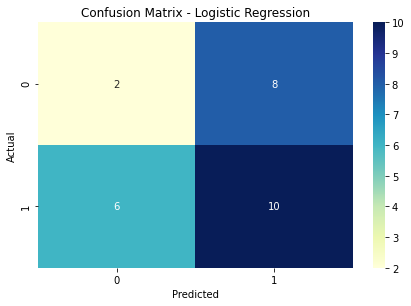

In [18]:
#Confusion matrix.

conf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = ('Unsatisfied', 'Satisfied')
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')